# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url).json()
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | king
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | horsham
Processing Record 6 of Set 1 | drabiv
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | sao miguel do araguaia
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | tame
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | abengourou
Processing Record 21 of Set 1 | kone
Processing Record 22 of Set 1 | olonkinbyen
Processing Rec

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,16.14,59,44,3.53,AU,1713667057
1,fortuna,40.5982,-124.1573,13.85,91,100,6.17,US,1713667057
2,king,47.4665,-121.8179,5.78,91,100,0.89,US,1713667057
3,grytviken,-54.2811,-36.5092,5.05,92,100,5.04,GS,1713667023
4,horsham,51.0640,-0.3272,7.14,76,75,2.57,GB,1713667058


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,16.14,59,44,3.53,AU,1713667057
1,fortuna,40.5982,-124.1573,13.85,91,100,6.17,US,1713667057
2,king,47.4665,-121.8179,5.78,91,100,0.89,US,1713667057
3,grytviken,-54.2811,-36.5092,5.05,92,100,5.04,GS,1713667023
4,horsham,51.0640,-0.3272,7.14,76,75,2.57,GB,1713667058


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

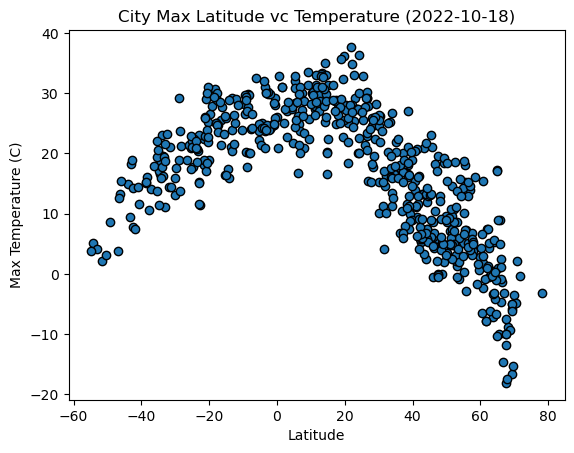

In [14]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df["Lat"]
y_values=city_data_df["Max Temp"]
plt.scatter(x_values,y_values,edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vc Temperature (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

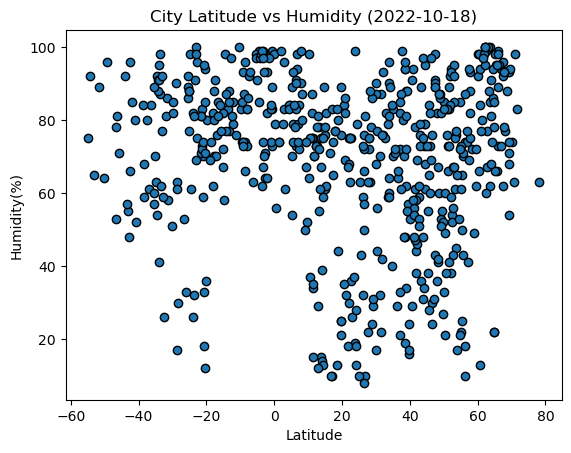

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df["Lat"]
y_values=city_data_df["Humidity"]
plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs Humidity (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

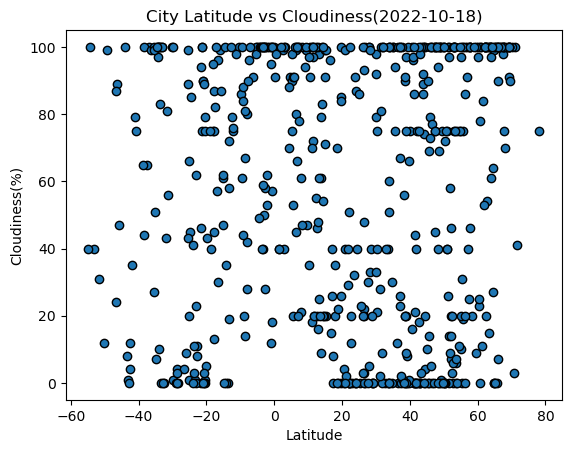

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
x_values=city_data_df["Lat"]
y_values=city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs Cloudiness(2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

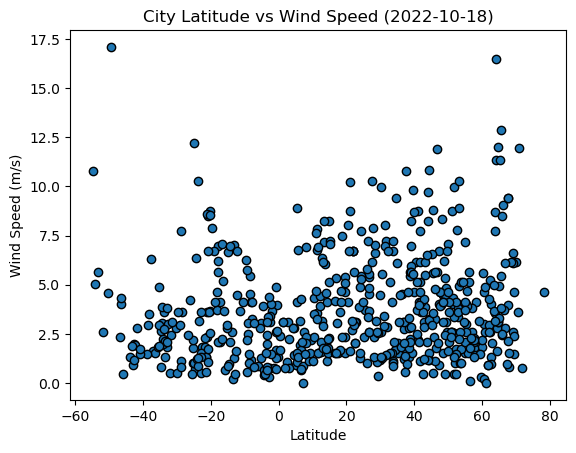

In [20]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x_values=city_data_df["Lat"]
y_values=city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots
def linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel):
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   regress_values = x_values * slope + intercept
   line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
   plt.scatter(x_values,y_values)
   plt.plot(x_values,regress_values,"r-")
   plt.annotate(line_eq,(x_axis,y_axis),fontsize=15,color="red")
   print(f"The r-value is: {rvalue}")
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   plt.show()

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fortuna,40.5982,-124.1573,13.85,91,100,6.17,US,1713667057
2,king,47.4665,-121.8179,5.78,91,100,0.89,US,1713667057
4,horsham,51.0640,-0.3272,7.14,76,75,2.57,GB,1713667058
5,drabiv,49.9630,32.1529,9.58,85,100,7.09,UA,1713667058
7,san patricio,28.0170,-97.5169,25.92,75,100,2.35,US,1713667059


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,16.14,59,44,3.53,AU,1713667057
3,grytviken,-54.2811,-36.5092,5.05,92,100,5.04,GS,1713667023
6,adamstown,-25.0660,-130.1015,22.73,77,1,12.20,PN,1713667059
8,port elizabeth,-33.9180,25.5701,19.62,95,100,3.60,ZA,1713667059
12,sao miguel do araguaia,-13.2750,-50.1628,23.86,88,72,1.29,BR,1713667060


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8676259302694085


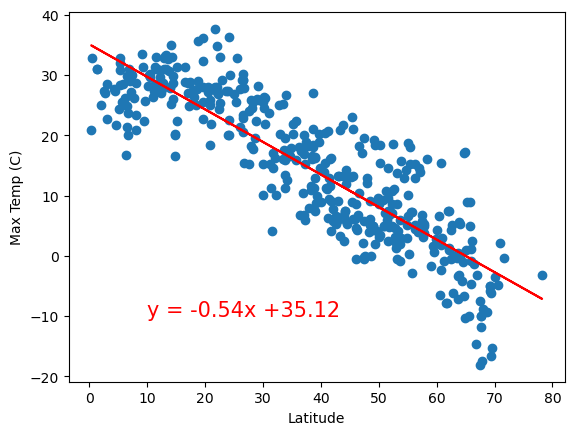

In [100]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']
xlabel="Latitude"
ylabel="Max Temp (C)"
x_axis=10
y_axis=-10
linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel)

The r-value is: 0.7692522642013623


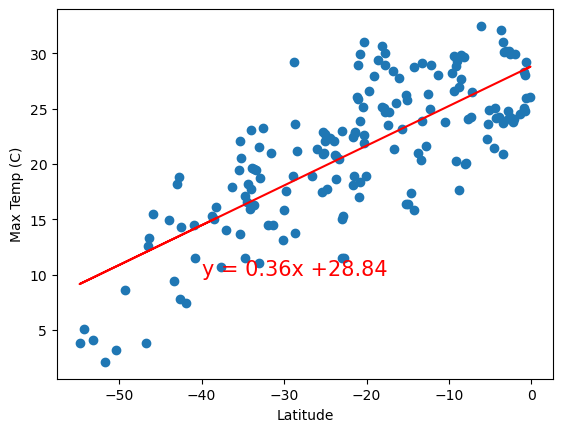

In [104]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']
xlabel="Latitude"
ylabel="Max Temp (C)"
x_axis=-40
y_axis=10
linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel)

**Discussion about the linear relationship: In the northhemisphere, temperature decreases with the increase of latitude, r value is around -0.87 which means the the temperature is strongly negatively correlated with the latitude; In the southhemisphere, temperature increases with the increase of latitude, r value is around 0.77 which means the the temperature is strongly positively correlated with the latitude

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12700923494789068


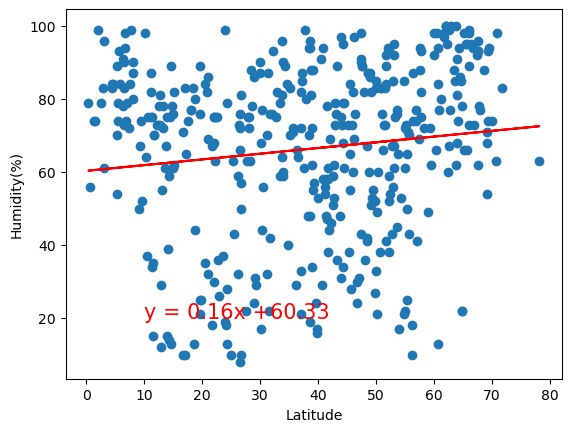

In [106]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']
xlabel="Latitude"
ylabel="Humidity(%)"
x_axis=10
y_axis=20
linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel)

The r-value is: 0.25050141443630763


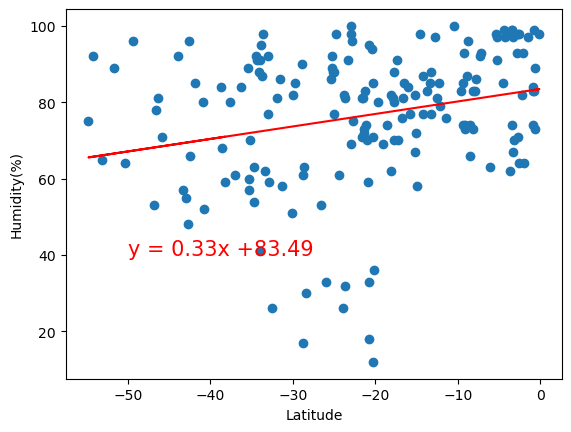

In [108]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']
xlabel="Latitude"
ylabel="Humidity(%)"
x_axis=-50
y_axis=40
linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel)

**Discussion about the linear relationship:In both northern and southern hemisphere, humitidy is positively correlated with the latitude, however, the associoation is weak, with southern hemisphere has slightly higher r value (~0.25) comparared to northern hemisphere (~0.13)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07640430306995752


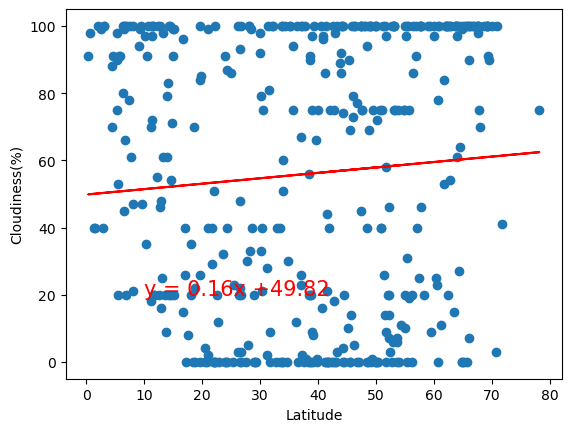

In [112]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']
xlabel="Latitude"
ylabel="Cloudiness(%)"
x_axis=10
y_axis=20
linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel)

The r-value is: 0.2055387457310823


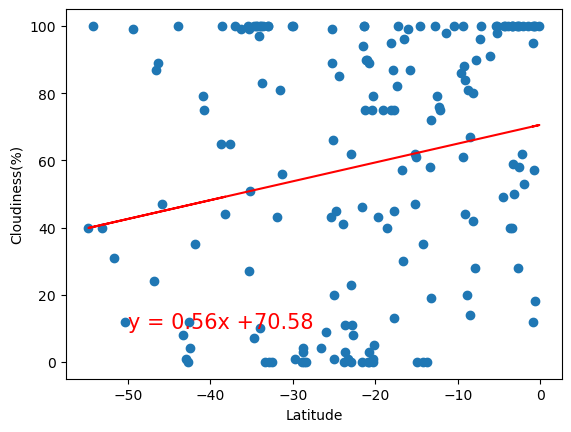

In [114]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
xlabel="Latitude"
ylabel="Cloudiness(%)"
x_axis=-50
y_axis=10
linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel)

**Discussion about the linear relationship:There is very weak possitive correlation between cloudiness and latitude in both hemispheres,as r values are both less than 0.25 and the cities dots are diversely scattered in the plots. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10705016344177994


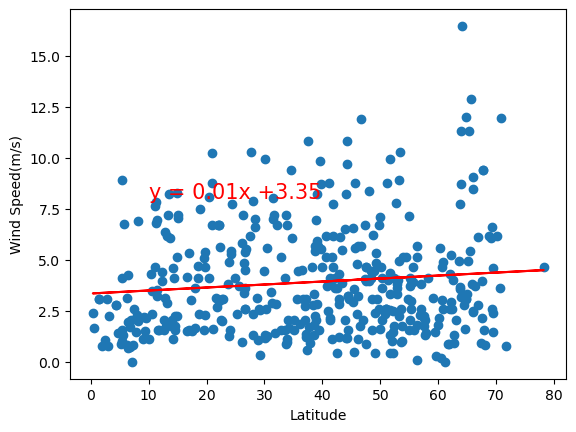

In [118]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
xlabel="Latitude"
ylabel="Wind Speed(m/s)"
x_axis=10
y_axis=8
linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel)

The r-value is: -0.13250952052724888


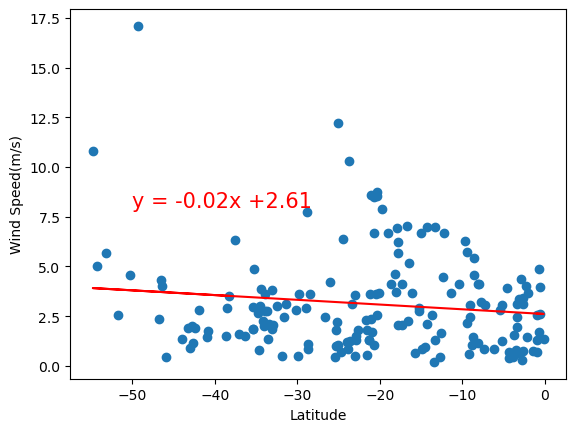

In [120]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
xlabel="Latitude"
ylabel="Wind Speed(m/s)"
x_axis=-50
y_axis=8
linearPlot(x_values,y_values,x_axis,y_axis,xlabel,ylabel)

**Discussion about the linear relationship:There is weak correlation (northern: ~ 0.1; southern: ~-0.13) between wind speed and latitude in both hemispheres, in the northernhemisphere, the correlation is positive, while in the southern hemisphere, this assiciation is negative. 